# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_tennis = pd.read_csv('data/tennis.csv')

federer_pts = (df_tennis['player1 total points won']
               .dropna()
               .mean()
               )
player2_pts = (df_tennis['player2 total points won']
               .dropna()
               .mean()
               )

print(federer_pts)
print(player2_pts)

print(f'Federer is averaging {federer_pts} compare to for his opponent {player2_pts}, based on the average Federer score more total point than his opponent.')

86.86952288218112
73.91723466407011
Federer is averaging 86.86952288218112 compare to 73.91723466407011, based on the average Federer score more total point than his opponent.


# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [147]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import numpy as np
from scipy import stats


array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>],
       [<AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>],
       [<AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>],
       [<AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

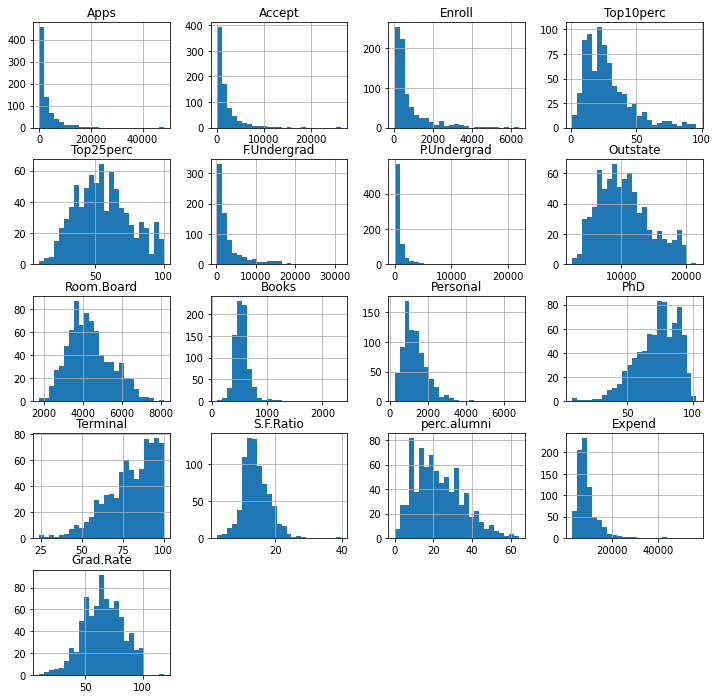

In [9]:
df_college = pd.read_csv('data/college.csv')
#df_college.info

df_college.hist(figsize=(12, 12), bins=25)

In [18]:
#1 which columns are possibility from a normal distribution?

for i in df_college.columns[2:]:
    stats, p = sc.stats.normaltest(df_college[i])
    if p < 0.05:  # null hypothesis: c comes from a normal distribution
        print(f"P-value is less than 0.05: {i} is not a normal distribution ")
    else:
        print(f"P-value is greater than 0.05: {i} is a normal distribution")

P-value is less than 0.05: Apps is not a normal distribution 
P-value is less than 0.05: Accept is not a normal distribution 
P-value is less than 0.05: Enroll is not a normal distribution 
P-value is less than 0.05: Top10perc is not a normal distribution 
P-value is less than 0.05: Top25perc is not a normal distribution 
P-value is less than 0.05: F.Undergrad is not a normal distribution 
P-value is less than 0.05: P.Undergrad is not a normal distribution 
P-value is less than 0.05: Outstate is not a normal distribution 
P-value is less than 0.05: Room.Board is not a normal distribution 
P-value is less than 0.05: Books is not a normal distribution 
P-value is less than 0.05: Personal is not a normal distribution 
P-value is less than 0.05: PhD is not a normal distribution 
P-value is less than 0.05: Terminal is not a normal distribution 
P-value is less than 0.05: S.F.Ratio is not a normal distribution 
P-value is less than 0.05: perc.alumni is not a normal distribution 
P-value is l

In [25]:
#2 Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)
# I would assume based on the wikipedia page that the enroll (#3) is a Pareto distribution, since the principle is 80-20 rule. 

df_college


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [28]:
#3 Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.
coeff_1 = sc.stats.pearsonr(df_college['Apps'], df_college['Accept'])[0]
coeff_2 = sc.stats.pearsonr(df_college['F.Undergrad'], df_college['Enroll'])[0]
coeff_3 = sc.stats.pearsonr(df_college['Top10perc'], df_college['Top25perc'])[0]
print(coeff_1)
print(coeff_2)
print(coeff_3)

0.9434505720431934
0.964639651952242
0.8919949726786705


In [30]:
#Give 3 column pairs that are not correlated? Give their correlation coefficients.

coeff_4 = sc.stats.pearsonr(df_college['Books'], df_college['Grad.Rate'])[0]
coeff_5 = sc.stats.pearsonr(df_college['F.Undergrad'], df_college['P.Undergrad'])[0]
coeff_6 = sc.stats.pearsonr(df_college['Accept'], df_college['Outstate'])[0]
print(coeff_4)
print(coeff_5)
print(coeff_6)

0.0010608943965530991
0.5705121869790887
-0.025754546603315324


### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

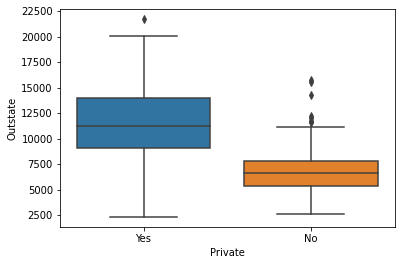

In [32]:
sns.boxplot(x='Private', y='Outstate', data=df_college)

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [135]:
#delim_whitespace allow me to specifies whether or not whitespace will be used as the sep. 
df = pd.read_csv('data/auto.csv', delim_whitespace = True)
df = df.drop(df.index[[0]])
df['weight'] = df['weight'].astype(float)
df['mpg'] = df['mpg'].astype(float)
df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype(float)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [126]:
df[df['horsepower'] == '?']


,horsepower,weight,year,mpg
33,?,2046.0,71.0,25.0
127,?,2875.0,74.0,21.0
331,?,1835.0,80.0,40.9
337,?,2905.0,80.0,23.6
355,?,2320.0,81.0,34.5


We can see an increase in efficiency and this could be explained byy the decreased in weight of vehicules and in horsepower


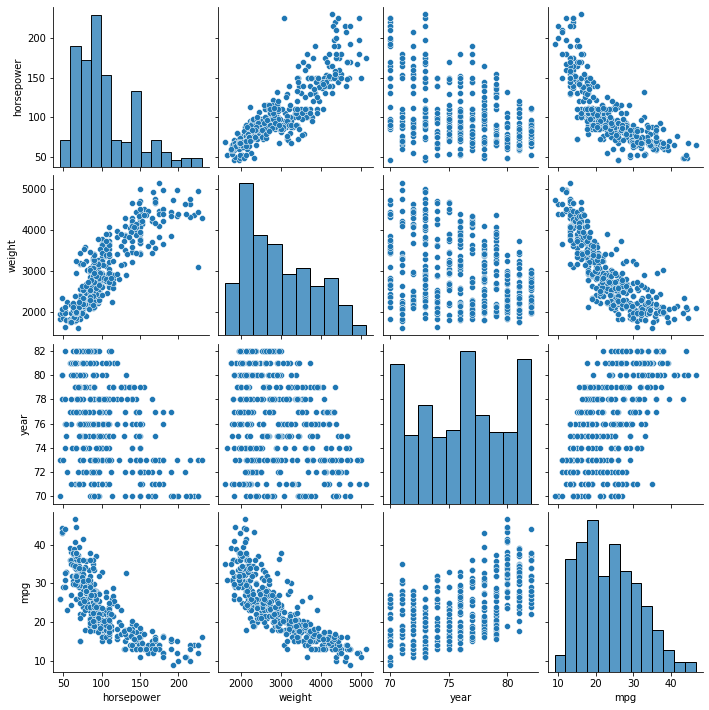

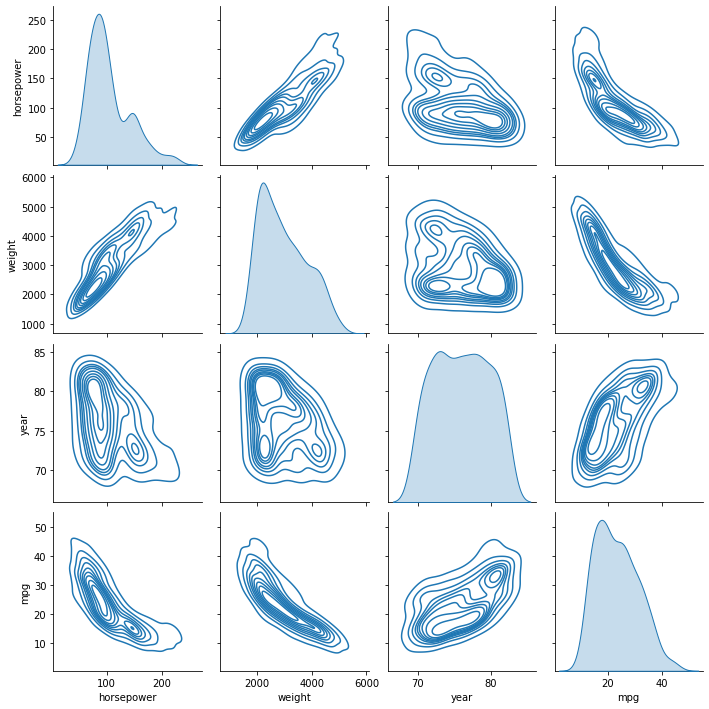

In [141]:
df_1 = df[['horsepower', 'weight', 'year', 'mpg']]

sns.pairplot(df_1)
sns.pairplot(df_1, kind="kde")
print("We can see an increase in efficiency and this could be explained byy the decreased in weight of vehicules and in horsepower")

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [138]:
#the mean is equal to the 50%
df[['cylinders', 'displacement', 'weight', 'acceleration']].describe().loc[['mean', '50%', 'std']]

,cylinders,displacement,weight,acceleration
mean,5.458438,193.532746,2970.261965,15.555668
50%,4.000000,146.000000,2800.000000,15.500000
std,1.701577,104.379583,847.904119,2.749995


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [142]:
df2 = df.drop([df.index[10], df.index[85]])
df2[['cylinders', 'displacement', 'weight', 'acceleration']].describe().loc[['mean', '50%', 'std']]
#the mean didnt change that much. 

,cylinders,displacement,weight,acceleration
mean,5.445570,192.656962,2965.901266,15.576203
50%,4.000000,146.000000,2795.000000,15.500000
std,1.696203,103.905655,847.608812,2.739621


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

100.0

In [144]:
from sklearn.datasets import load_boston

df_boston = pd.DataFrame(data=load_boston()['data'], columns=load_boston()["feature_names"])

print('the crime rate seems correlated with TAX')
df_boston.corr()
#give explanation 

the crime rate seems correlated with TAX


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [153]:
df_boston_2 = df_boston[['CRIM', 'TAX', 'PTRATIO']]
for feature in df_boston_2.columns:
    temp = df_boston_2[[feature]].sort_values(feature, ascending=False).head(50)
    print(temp.describe())

print("The PTRATIO seems similar accross different town, however, the stats also shows that some towns has a higher crime rates and taxes rates.")

            CRIM
count  50.000000
mean   22.888574
std    16.670149
min    11.087400
25%    13.736925
50%    15.867350
75%    24.207400
max    88.976200
              TAX
count   50.000000
mean   670.500000
std     13.637059
min    666.000000
25%    666.000000
50%    666.000000
75%    666.000000
max    711.000000
         PTRATIO
count  50.000000
mean   21.092000
std     0.213656
min    20.900000
25%    21.000000
50%    21.000000
75%    21.200000
max    22.000000
The PTRATIO seems similar accross different town, however, the stats also shows that some towns has a higher crime rates and taxes rates.


### 4.3 How many of the suburbs in this data set bound the Charles river?

In [158]:
print(f"The amount of suburbs setting the bound of the Charles river is: {df_boston['CHAS'].sum()}")

The amount of suburbs setting the bound of the Charles river is: 35.0


### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [160]:
print(f"The median for the pupil-teach ration is: {df_boston['PTRATIO'].median()}")

The median for the pupil-teach ration is: 19.05


### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [164]:
df['MEDV'] = load_boston()['target']
df.sort_values(by='MEDV')

#The index of the lowest mediam value is 398, it looks like a small zone. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0


### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [171]:
print(f"There are {len(df.loc[df['RM'] > 7])} suburbs with more than seven room")
print(f"There are {len(df.loc[df['RM'] > 8])} suburbs with more than seven room")

There are 64 suburbs with more than seven room
There are 13 suburbs with more than seven room
